# **Data Science & Business Analytics**
# **Task-3**
# **Exploratory Data Analysis - Retail**

Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ .As a business manager, try to find out the weak areas where you can 
work to make more profit. 
 


Dataset: https://bit.ly/3i4rbWl

Steps to be followed :


*   Importing the libraries

*   Reading the dataset
*   Data Preprocessing


*   EDA

*   Data Visualization


**Author : Y.V.Krishna Chaitanya**







In [2]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [8]:
# Reading dataset
df=pd.read_csv('/content/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
df.shape

(9994, 13)

In [13]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# **Exploratory Data Analysis**

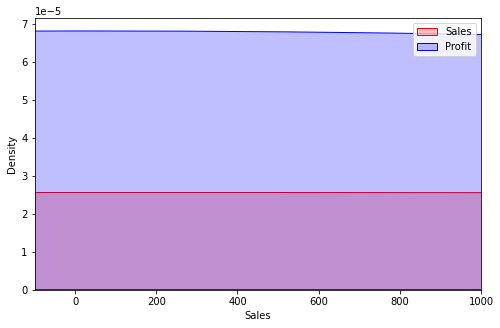

In [14]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Sales'], color='red', label='Sales', shade=True,bw=25)
sns.kdeplot(df['Profit'], color='Blue', label='Profit', shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()

Profit is more than that of sale but there are some areas where profit could be increased.

# **Analysis using Pairplot of each column**

Based on the Catagory

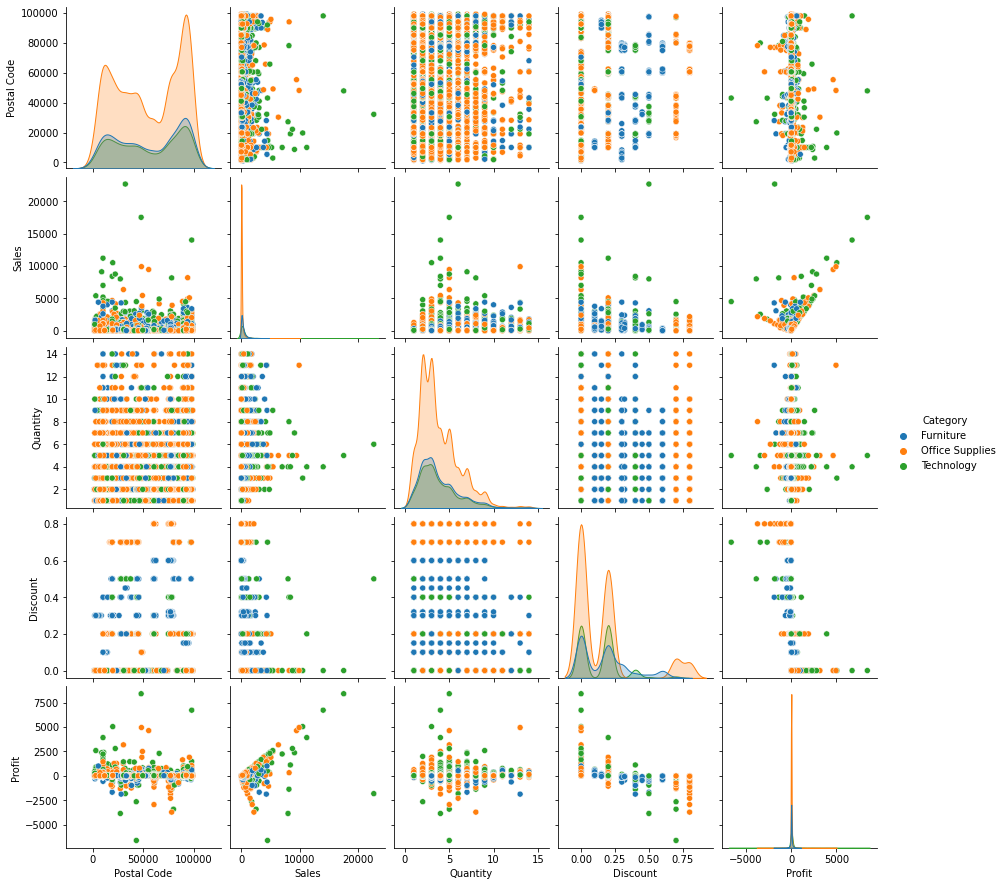

In [15]:
sns.pairplot(df,hue='Category')

Based on Region

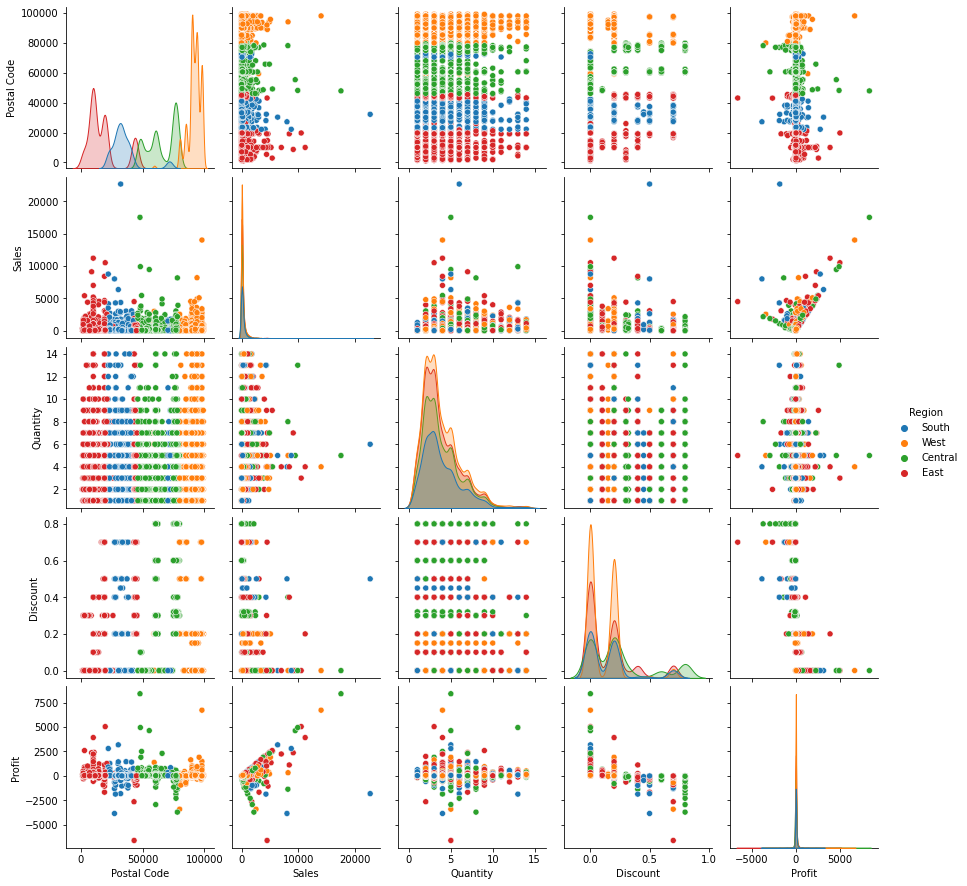

In [16]:
sns.pairplot(df,hue='Region')

In [17]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


# **Heatmap for Correlation**

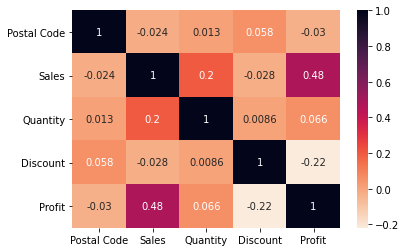

In [18]:
sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

We can see that :

 ● Sales and Profit are Moderately Correlated.

 ● Discount and Profit are Negatively Correlated.
 
 ● Quantity and Profit are less Moderately Correlated.  

 **Count plot of each column**

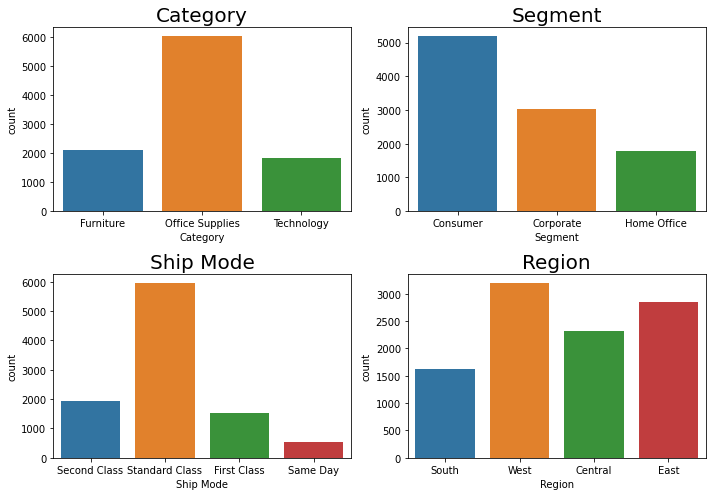

In [21]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(df['Category'],ax=axs[0][0])
sns.countplot(df['Segment'],ax=axs[0][1])
sns.countplot(df['Ship Mode'],ax=axs[1][0])
sns.countplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)

plt.tight_layout()

Text(0.5, 1.0, 'Sub Category')

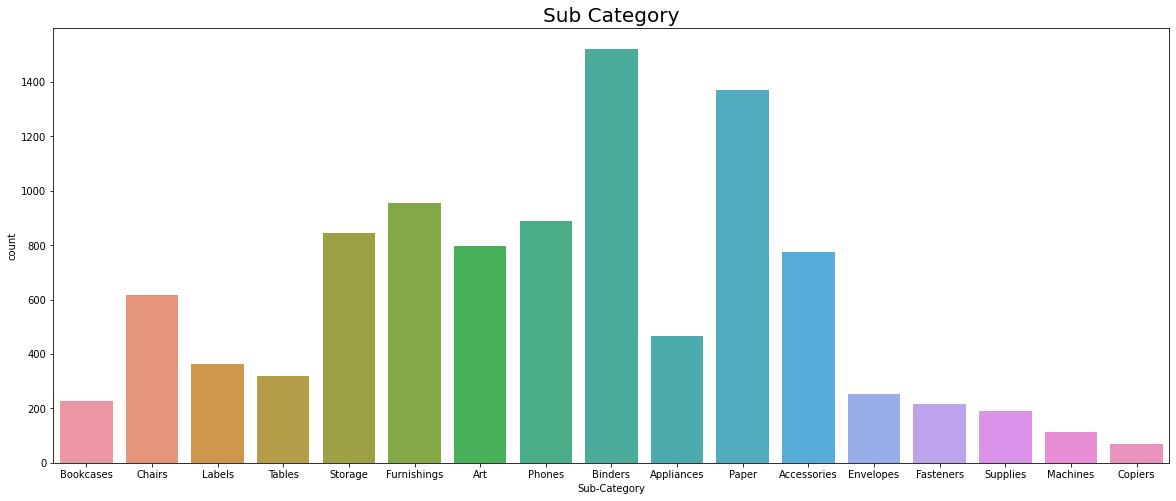

In [23]:
plt.figure(figsize=(20,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub Category',fontsize=20)

Text(0.5, 1.0, 'Quantity')

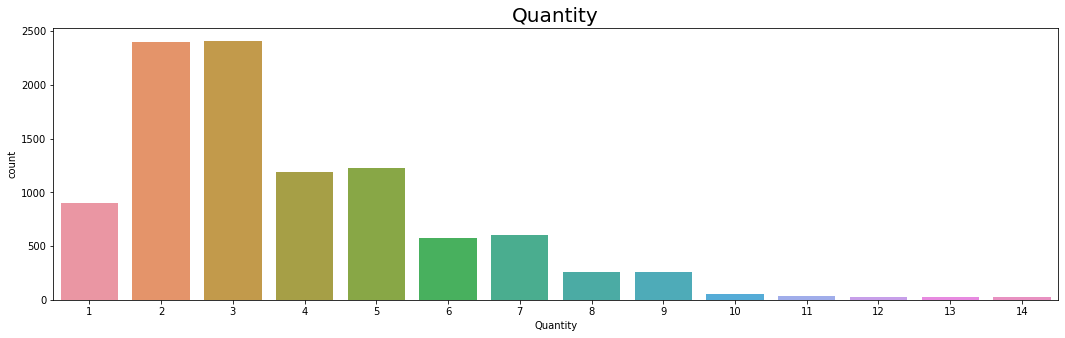

In [24]:
plt.figure(figsize=(18,5))
sns.countplot(df['Quantity'])
plt.title('Quantity',fontsize=20)

Text(0.5, 1.0, 'Discount')

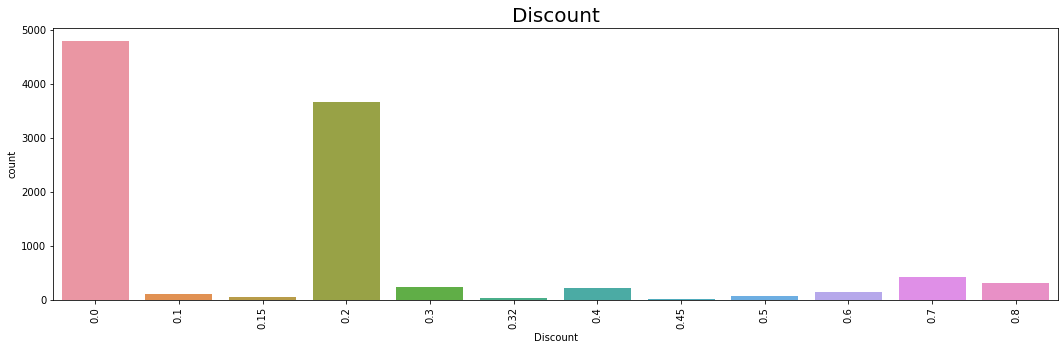

In [25]:
plt.figure(figsize=(18,5))
sns.countplot(df['Discount'])
plt.xticks(rotation=90)
plt.title('Discount',fontsize=20)

# **Distribution of the data using the plot**

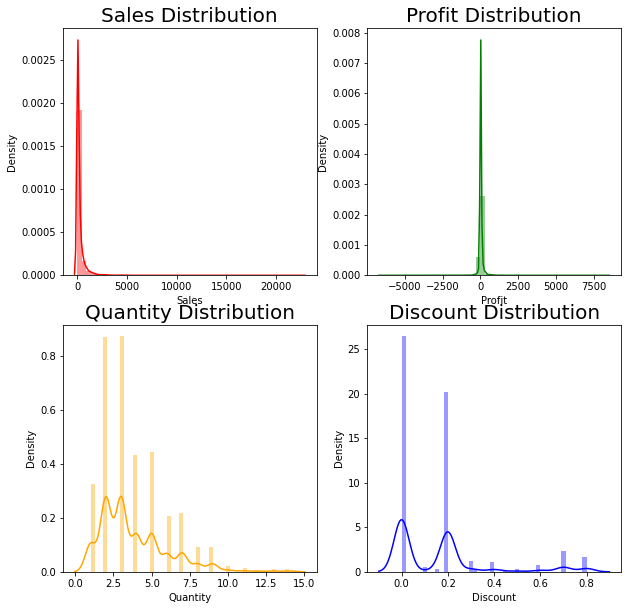

In [26]:
fig,axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))

sns.distplot(df['Sales'],color='red',ax=axs[0][0])
sns.distplot(df['Profit'],color='green',ax=axs[0][1])
sns.distplot(df['Quantity'],color='orange',ax=axs[1][0])
sns.distplot(df['Discount'],color='blue',ax=axs[1][1])
axs[0][0].set_title('Sales Distribution',fontsize=20)
axs[0][1].set_title('Profit Distribution',fontsize=20)
axs[1][0].set_title('Quantity Distribution',fontsize=20)
axs[1][1].set_title('Discount Distribution',fontsize=20)

plt.show()

# **Statewise Deal Analysis**

In [27]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [28]:
df1=df['State'].value_counts()
df1.head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

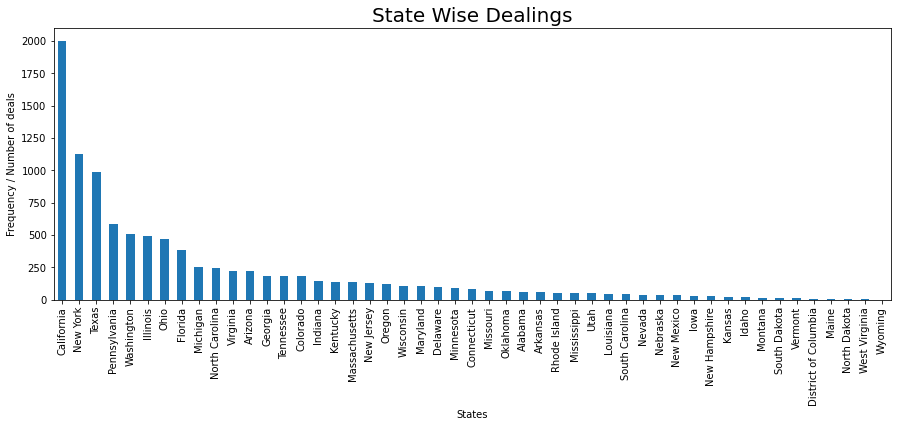

In [29]:
df1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealings',fontsize=20)
plt.show()

Top 3 state where deals are **Highest**

Califonia

New York

Texas

# **Wyoming:Lowest Number of deal**

In [30]:
df['State'].value_counts().mean()#avg no.of deal per state is 204.

203.9591836734694

# **City Wise Analysis of the dealing**

In [35]:
df2=df['City'].value_counts()
df2=df2.head(25)
df2

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Arlington         60
San Antonio       59
Miami             57
Louisville        57
Rochester         53
Name: City, dtype: int64

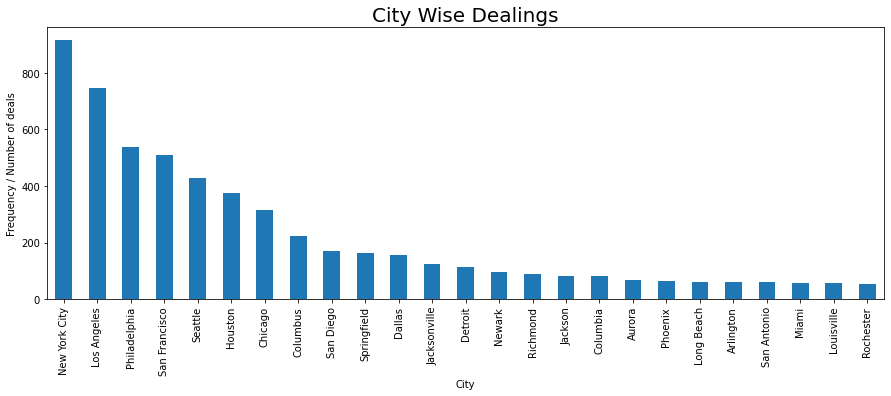

In [36]:
df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings',fontsize=20)
plt.show()

Top 3 cities where deals are **Highest **

New York City
 
Los Angeles

Philadelphia


In [38]:
df['City'].value_counts().mean()#avg no.of deal per city is 19

18.821092278719398

# **Segment Wise Analysis of Profit,Discount and sell**

In [39]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [40]:
df_segment=df.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount, Profit')

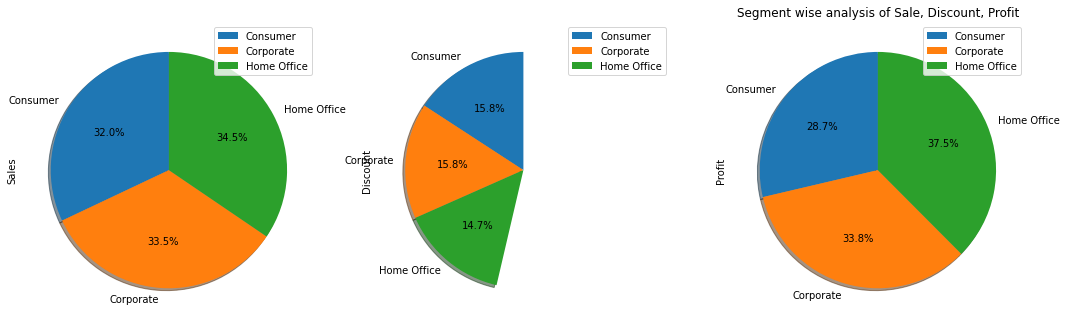

In [42]:
#1.sales 2.Discount 3.Profit
df_segment.plot.pie(subplots=True,
                    autopct='%1.1f%%',
                    figsize=(18,20),
                    startangle=90,
                    shadow=True,
                    labels=df_segment.index)
plt.title('Segment wise analysis of Sale, Discount, Profit')

**Sales** :


*   Consumer : 32%
*   Corporate : 33.5%
*   Home Office : 34.5%

**Discount** : 


*   Consumer : 15.8%
*   Corporate : 15.8%
*   Home Office : 14.7%

**Profit** :
 


*   Consumer : 28.7 %
*   Corporate : 33.8%
*   Home Office : 37.5%











**Statewise analysis of Profit Discount and Sell**

In [43]:
df['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [44]:
df_state=df.groupby(['State'])[['Sales','Discount','Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


# **Statewise Profit Analysis**

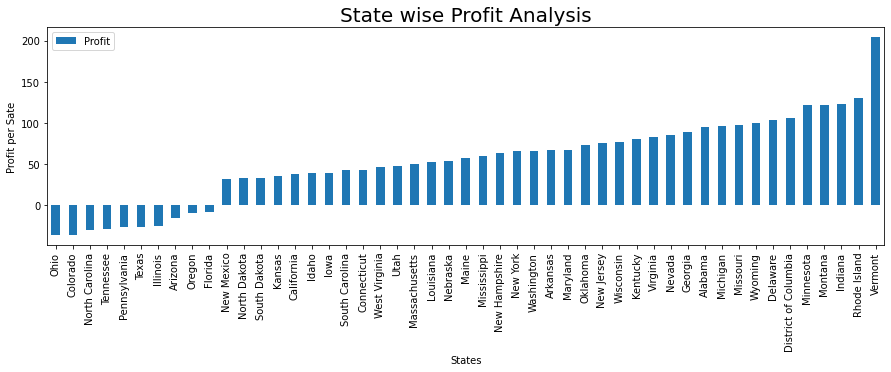

In [45]:
df_state1=df_state.sort_values('Profit')

df_state1[['Profit']].plot(kind='bar',figsize=(15,4))
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.title('State wise Profit Analysis',fontsize=20)
plt.show()

**RESULT**


*   Vermont : Highest Profit
*  Ohio : Lowest Profit



# **Statewise Sale Analysis**

Text(0.5, 1.0, 'State wise analysis of Sale')

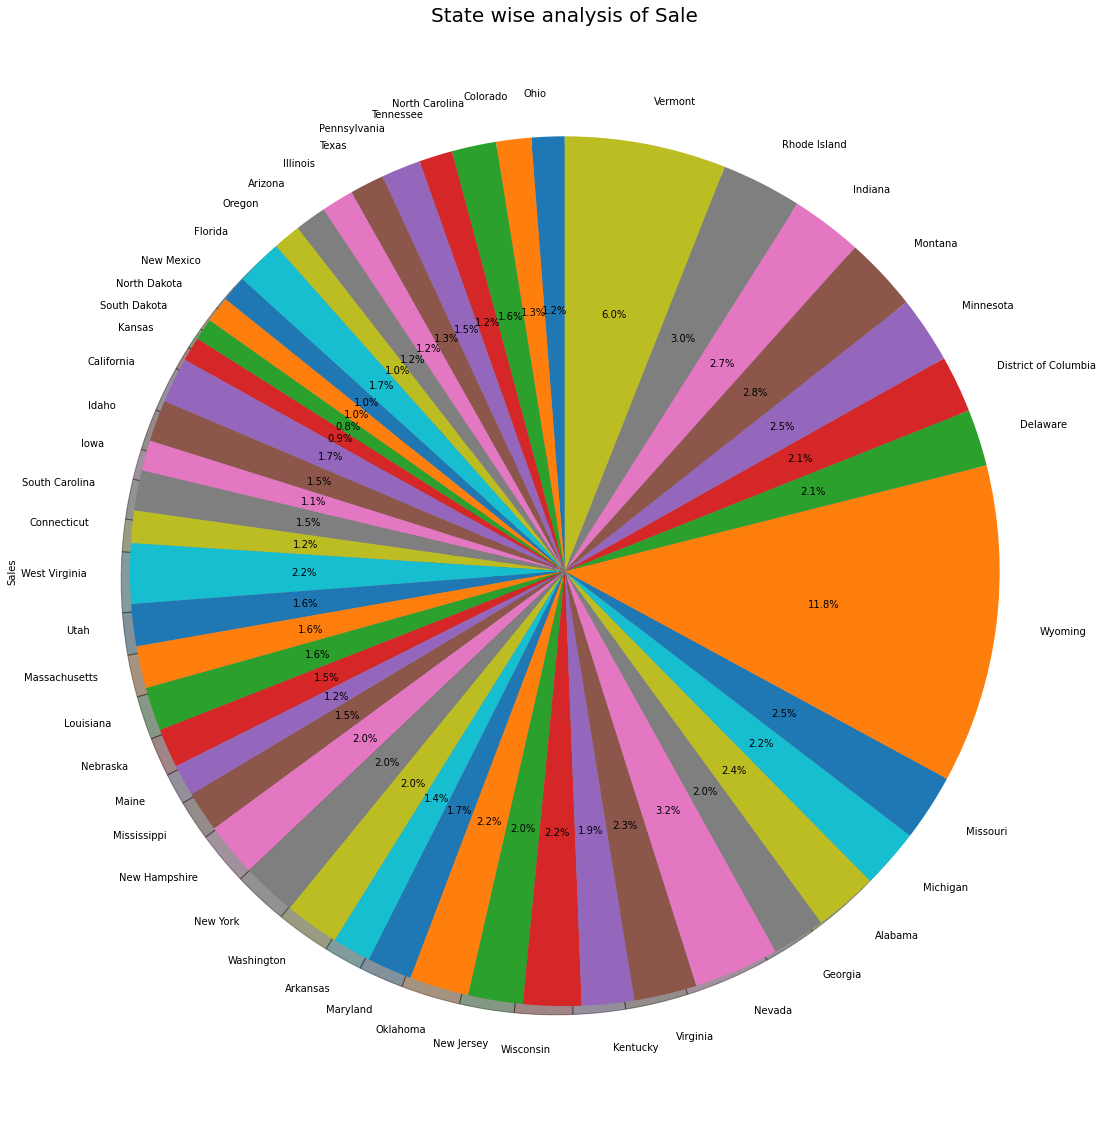

In [47]:
df_state1['Sales'].plot(kind='pie',
                       figsize=(20,20),
                       autopct='%1.1f%%',
                       startangle=90,
                       shadow=True)
plt.title('State wise analysis of Sale',fontsize=20)

**RESULT**


*   Highest Amount of sales : **Wyoming(11.8%)**
*   Lowest amount of sales : **South Dakota(0.8%)**



# **Statewise Discount Analysis**

Text(0.5, 1.0, 'State wise analysis of Discount')

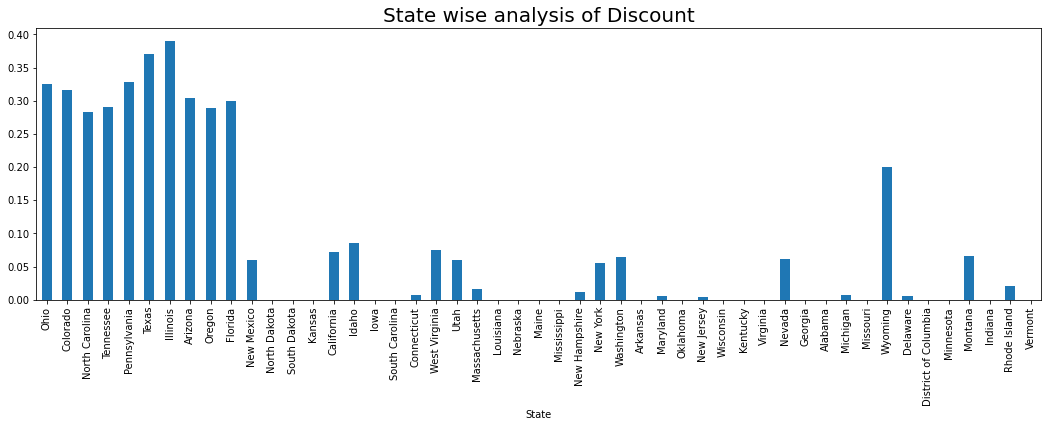

In [48]:
df_state1['Discount'].plot(kind='bar',figsize=(18,5))
plt.title('State wise analysis of Discount',fontsize=20)

**lllinois at the top**

# **Citywise Analysis of the Profit**

In [49]:
df_city=df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df_city=df_city.sort_values('Profit')
df_city.head()


,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


In [52]:
df_city.tail()

,Sales,Discount,Profit
City,,,
Appleton,835.655000,0.0,277.383150
Minneapolis,733.501739,0.0,296.721070
Lafayette,807.619355,0.0,323.173794
Independence,1208.685000,0.0,487.831500
Jamestown,2354.395000,0.0,642.885750


Text(0.5, 1.0, 'City wise analysis of Sale, Discount, Profit ')

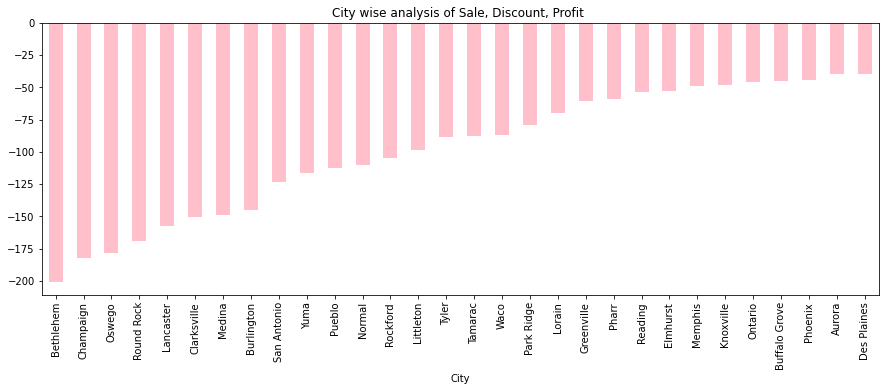

In [51]:
#Low profit
df_city['Profit'].head(30).plot(kind='bar',figsize=(15,5),color='Pink')
plt.title('City wise analysis of Sale, Discount, Profit ')

Text(0.5, 1.0, 'City wise analysis of Sale, Discount, Profit ')

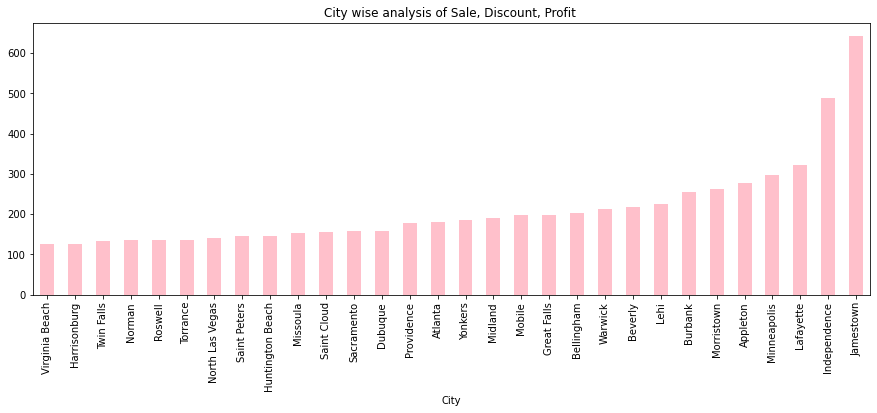

In [53]:
#High profit
df_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5),color='Pink')
plt.title('City wise analysis of Sale, Discount, Profit ')

30 cities which has profit in **positive** 

30 cities which has profit in **negative**

The balance is pretty **good** here

# **Quantity wise Sales,Profit and Discount Analysis**

In [54]:
df_quantity = df.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df_quantity.head(10)

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.354488,0.154858,16.006831
3,175.201578,0.153329,23.667715
4,271.764059,0.157708,37.131310
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


Text(0.5, 1.0, 'Quantity wise analysis of Sale, Discount, Profit')

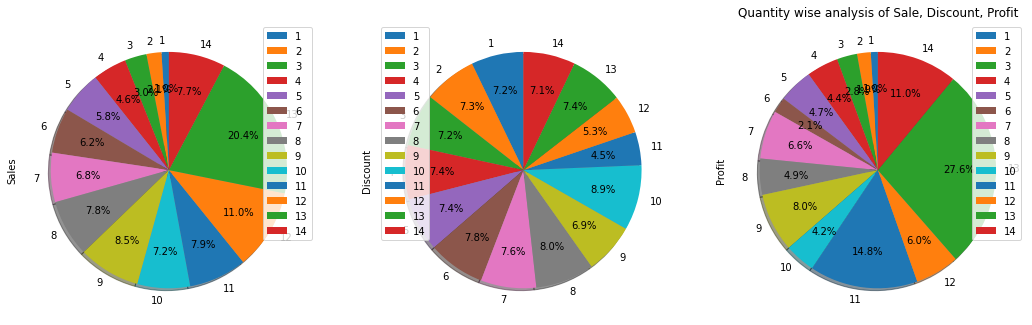

In [55]:
#1.sales 2.Discount 3.Profit
df_quantity.plot.pie(subplots=True,
                    autopct='%1.1f%%',
                    figsize=(18,20),
                     pctdistance=0.69,
                    startangle=90,
                    shadow=True,
                    labels=df_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, Profit')

13 number of Quantity is high for sales and profit

# **Category wise Sales,Discount and Profit**

In [56]:
df_category=df.groupby(['Category'])[['Sales','Discount','Profit']].mean()
df_category

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


Text(0.5, 1.0, 'Category  wise analysis of Sale, Discount, Profit')

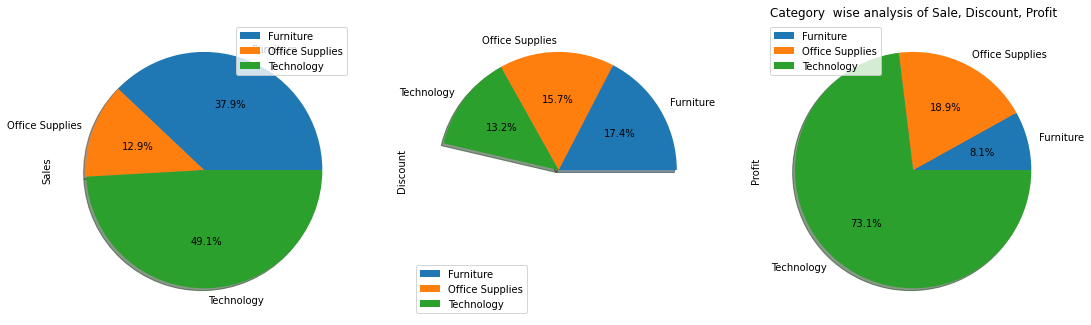

In [57]:
#1.sales 2.Discount 3.Profit
df_category.plot.pie(subplots=True,
                    autopct='%1.1f%%',
                    figsize=(18,20),
                    shadow=True,
                    labels=df_category.index)
plt.title('Category  wise analysis of Sale, Discount, Profit')



*   Maximum sales and profit obtain in Technology
*   Minimum profit obtain in Furniture



# **Sub-Category wise Sales,Profit and Discount**

In [58]:
df_sub_category=df.groupby(['Sub-Category'])[['Sales','Discount','Profit']].mean()
df_sub_category.head(10)

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


**Based on the sales**

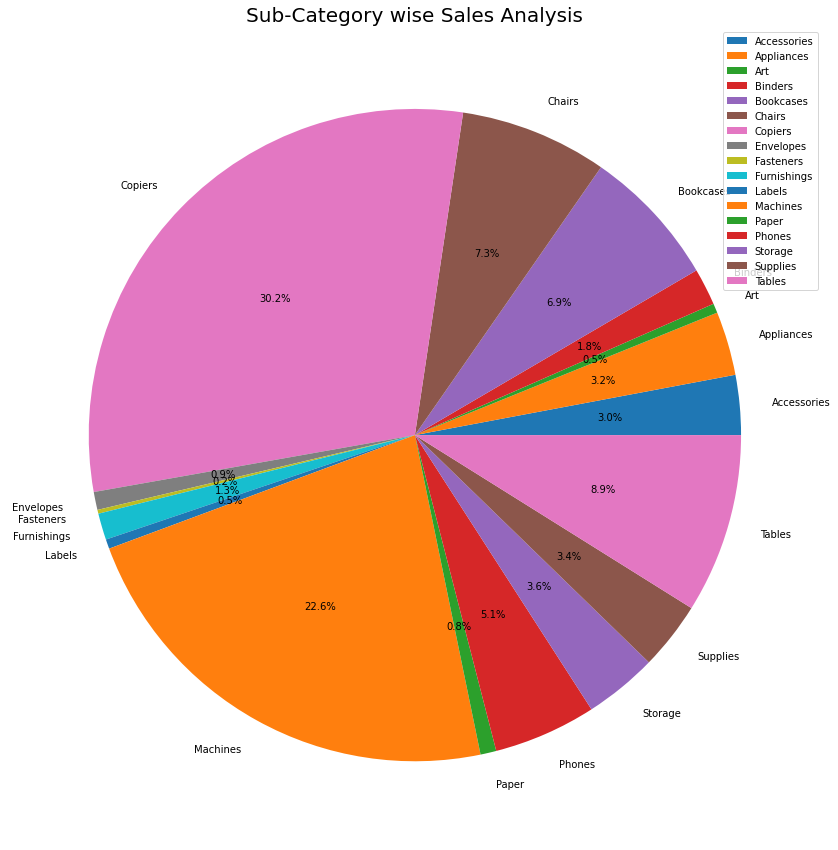

In [59]:
plt.figure(figsize=(15,15))
plt.pie(df_sub_category['Sales'], labels=df_sub_category.index,autopct='%1.1f%%')
plt.title('Sub-Category wise Sales Analysis', fontsize=20)
plt.legend()
plt.xticks(rotation=90)
plt.show()

Copiers and machines have high sales. 

**Based on the Discount**

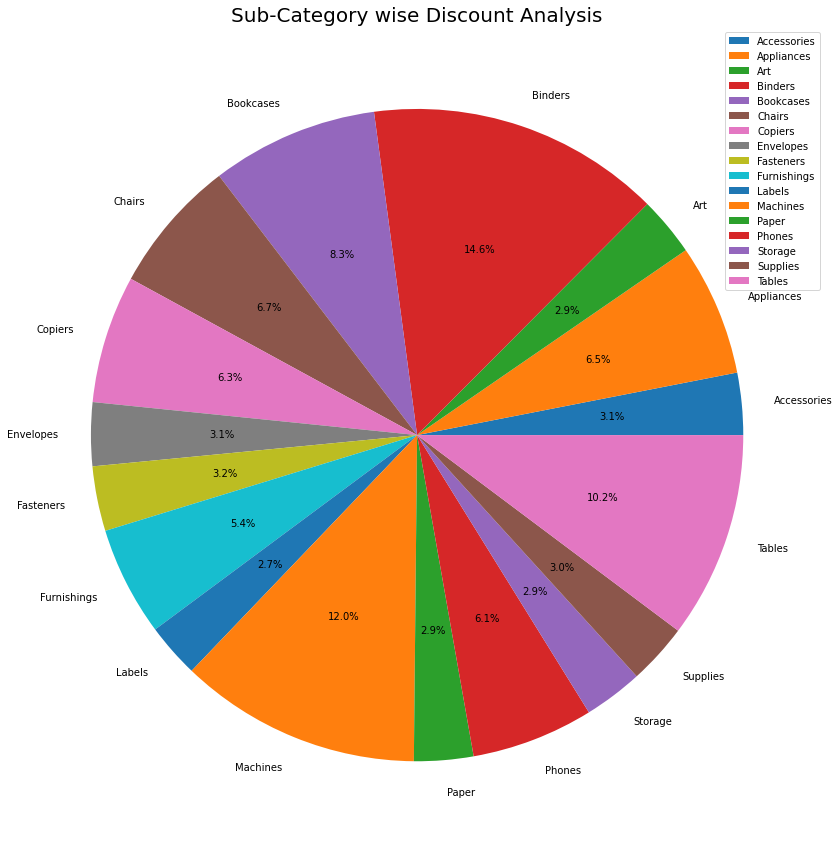

In [60]:
plt.figure(figsize=(15,15))
plt.pie(df_sub_category['Discount'], labels=df_sub_category.index,autopct='%1.1f%%')
plt.title('Sub-Category wise Discount Analysis', fontsize=20)
plt.legend()
plt.xticks(rotation=90)
plt.show()

Binders,Machines and Tales have high discount

**Based on the Profit**

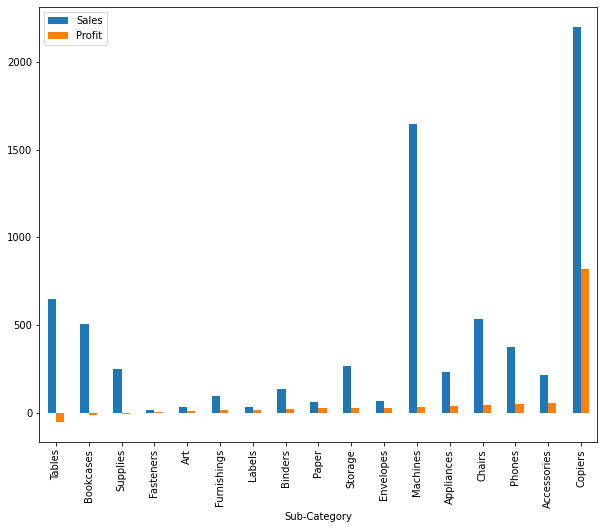

In [62]:
df_sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',
                                                               figsize=(10,8),
                                                               label=['Avg Sales Price($)','Profit($)'])

copier : highest profit as well as sell

# **Region Wise Analysis**

In [63]:
df_region=df.groupby(['Region'])[['Sales','Discount','Profit']].mean()
df_region

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb81e5be090>,
      dtype=object)

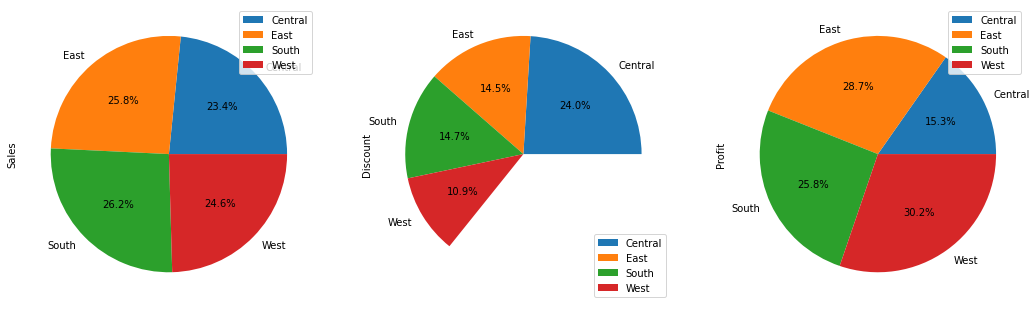

In [64]:
df_region.plot.pie(subplots=True,
                   figsize=(18,20),
                   autopct='%1.1f%%',
                   labels=df_region.index)

West : Profit is High


# **Ship Mode Wise Analysis**

In [65]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [67]:
df_shipmode=df.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb81e474c90>,
      dtype=object)

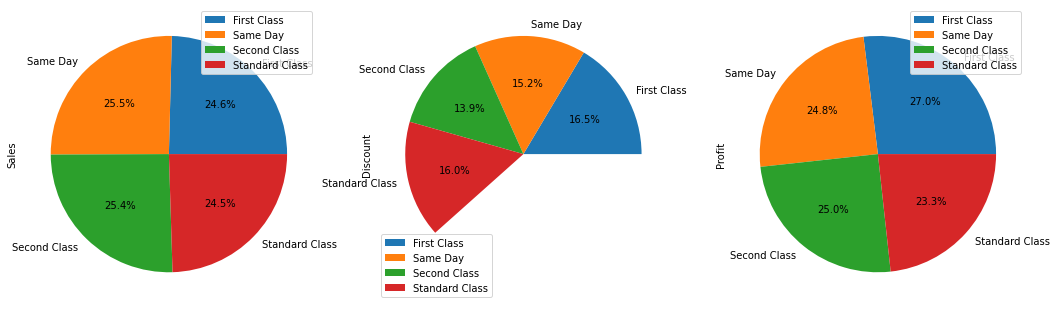

In [68]:
df_shipmode.plot.pie(subplots=True,
                     figsize=(18,20),
                     autopct='%1.1f%%',
                     labels=df_shipmode.index)

Profit and Discount is high in Frist Class

Sales is high for same day ship

# **RESULT AND CONCLUSION**



*   Profit is more than of sale but there are some areas wher eprofits could be increased.

*   Profit and Discount is high in First Class 

*   Sales is high for same day ship

*   Sub-category : copier - High Profit & sales

*   Sub-category : Binders.Machines and then tables have high Discount.

*   Category : Maximum sales and profit obtain in Technology.


*   Category : Minimum profit obtain in Furniture

*   State : Vermont - Highest Profit

*   State : Ohio - Lowest Profit

*   Segment : Home-office : High Profit & sales

*   Here is top 3 cities where deals are Highest 


1.   New York City
2.   Los Angeles
3.   Philadelphia

*   Sales and Profit are Moderately Correlated

*   Here is top  3 states where deals are Highest 


1.   Califonia
2.   New York
3.   Texas

*   Wyoming : Lowest Number of deal , Highest Amount of Sales = Wyoming(11.8%)

*   Lowest amount of sales = South Dakota(0.8%)


THANK YOU!

